# Having multi-headed G-functions with joint Optimization

## Extension of Symbolic interpretability for 2D classification task

### MNIST Data 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession


config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
from experiments.train_model import train_keras_model, simple_CNNmodel
from datasets.data_loader_UCI import mixup, data_loader
from sklearn.metrics import accuracy_score
from sympy.printing.latex import latex
import sklearn
import lime 
import lime.lime_tabular
import numpy as np

Using TensorFlow backend.






Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor






> 98.542
> 98.667
> 98.583
> 98.958
> 98.600


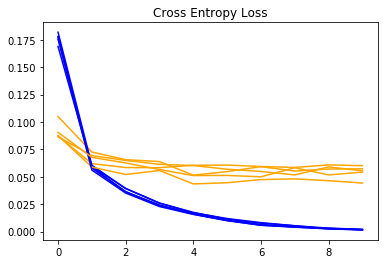

Accuracy: mean=98.670 std=0.150, n=5


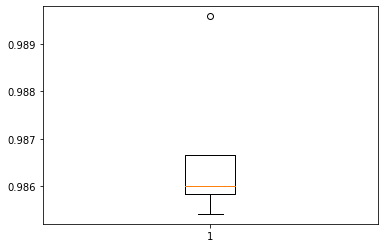

In [4]:
def load_mnist():
    return data_loader('mnist')

def define_mnist_model():
    return simple_CNNmodel(indim=(28, 28, 1), nclasses=10)

model = train_keras_model(load_mnist,
                        define_mnist_model,
                        folds = 5,
                        batch_size = 25,
                        epochs = 10)

In [5]:
trainX, trainY, testX, testY = load_mnist()
trainX.shape

(60000, 28, 28, 1)

In [ ]:
from symbolic_pursuit.classification2D import SymbolicClassifier2D

symbolic_model = SymbolicClassifier2D(verbosity=True,
                                   maxiter=5,
                                   nclasses=10,
                                   loss_tol=1.0)
symbolic_model.fit(model.predict, trainX[:30].reshape(30, 28, 28), nmax=1)

Model created with the following hyperparameters :
 loss_tol=1.0 
 ratio_tol=0.9 
 maxiter=5 
 eps=1e-05 
 random_seed=42
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Now working on term number  1 .
Now working on hyperparameter tree number  1 .
Optimization terminated successfully.
         Current function value: 4.130968
         Iterations: 3
         Function evaluations: 2960
         Gradient evaluations: 5
Now working on hyperparameter tree number  2 .
Optimization terminated successfully.
         Current function value: 4.137354
         Iterations: 0
         Function evaluations: 612
         Gradient evaluations: 1
Now working on hyperparameter tree number  3 .
